In [ ]:
!pip install --upgrade matplotlib seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:

!pip install -U scikit-learn

import sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
# clustering
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from matplotlib import cm
from sklearn.metrics import silhouette_samples, silhouette_score

In [ ]:
import warnings
warnings.simplefilter(action='ignore')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/CC GENERAL.csv')

In [ ]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
df.tail()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.00,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6
8949,C19190,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6


In [ ]:
df.shape

(8950, 18)

In [ ]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [ ]:
# impute with mean
df.loc[(df['MINIMUM_PAYMENTS'].isnull()==True),'MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].mean()
df.loc[(df['CREDIT_LIMIT'].isnull()==True),'CREDIT_LIMIT'] = df['CREDIT_LIMIT'].mean()

In [ ]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

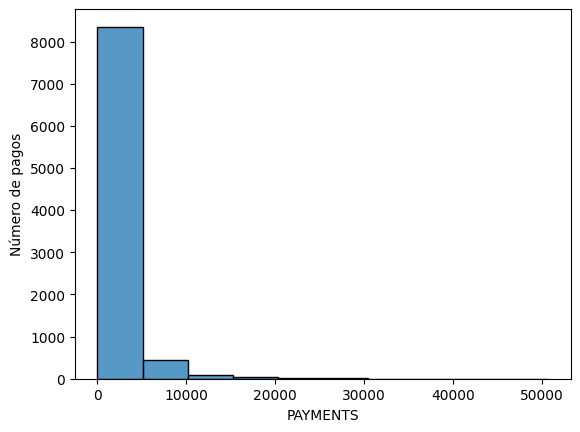

In [ ]:
sns.histplot(data = df, x = "PAYMENTS", bins = 10)
plt.ylabel("Número de pagos")
plt.show()

**Los Datos de forma descriptiva**

In [ ]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.612411,2895.063757,2330.588021,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,335.628312,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,864.206542,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [ ]:
df.sample(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
5009,C15150,41.049799,0.727273,413.31,133.31,280.00,0.000000,0.583333,0.083333,0.416667,0.000000,0,8,6000.0,475.939508,106.476161,0.625000,12
6573,C16752,734.337883,1.000000,55.68,0.00,55.68,0.000000,0.166667,0.000000,0.166667,0.000000,0,2,1000.0,938.997556,2896.436166,0.000000,12
8726,C18963,1425.003265,1.000000,562.42,0.00,562.42,1814.910939,0.750000,0.000000,0.666667,0.416667,7,19,1800.0,985.544048,883.852995,0.000000,12
1267,C11311,661.199437,0.545455,150.00,150.00,0.00,1344.227865,0.083333,0.083333,0.000000,0.250000,8,1,2500.0,290.372365,340.787739,0.000000,12
6279,C16454,2848.442843,1.000000,2148.02,1634.44,513.58,385.681980,1.000000,0.666667,0.583333,0.083333,1,32,3500.0,922.603695,764.904480,0.000000,12
2396,C12469,1299.933370,1.000000,0.00,0.00,0.00,916.370940,0.000000,0.000000,0.000000,0.083333,2,0,2400.0,303.052882,453.831541,0.000000,12
8072,C18290,425.848048,1.000000,0.00,0.00,0.00,697.854267,0.000000,0.000000,0.000000,0.666667,11,0,500.0,327.627263,208.295476,0.000000,12
5845,C16009,1613.502125,1.000000,65.60,0.00,112.60,0.000000,0.400000,0.000000,0.300000,0.000000,0,5,5000.0,390.916581,426.142311,0.000000,10
5940,C16106,121.117428,0.909091,968.64,0.00,968.64,0.000000,1.000000,0.000000,1.000000,0.000000,0,24,3000.0,764.973252,189.162675,0.181818,12
1251,C11295,621.386746,0.571429,178.83,178.83,0.00,913.392266,0.285714,0.285714,0.000000,0.142857,1,4,1200.0,96.011391,128.725608,0.000000,7


In [ ]:
df.max()

CUST_ID                                  C19190
BALANCE                             19043.13856
BALANCE_FREQUENCY                           1.0
PURCHASES                              49039.57
ONEOFF_PURCHASES                       40761.25
INSTALLMENTS_PURCHASES                  22500.0
CASH_ADVANCE                        47137.21176
PURCHASES_FREQUENCY                         1.0
ONEOFF_PURCHASES_FREQUENCY                  1.0
PURCHASES_INSTALLMENTS_FREQUENCY            1.0
CASH_ADVANCE_FREQUENCY                      1.5
CASH_ADVANCE_TRX                            123
PURCHASES_TRX                               358
CREDIT_LIMIT                            30000.0
PAYMENTS                            50721.48336
MINIMUM_PAYMENTS                    76406.20752
PRC_FULL_PAYMENT                            1.0
TENURE                                       12
dtype: object

In [ ]:
df.min()

CUST_ID                               C10001
BALANCE                                  0.0
BALANCE_FREQUENCY                        0.0
PURCHASES                                0.0
ONEOFF_PURCHASES                         0.0
INSTALLMENTS_PURCHASES                   0.0
CASH_ADVANCE                             0.0
PURCHASES_FREQUENCY                      0.0
ONEOFF_PURCHASES_FREQUENCY               0.0
PURCHASES_INSTALLMENTS_FREQUENCY         0.0
CASH_ADVANCE_FREQUENCY                   0.0
CASH_ADVANCE_TRX                           0
PURCHASES_TRX                              0
CREDIT_LIMIT                            50.0
PAYMENTS                                 0.0
MINIMUM_PAYMENTS                    0.019163
PRC_FULL_PAYMENT                         0.0
TENURE                                     6
dtype: object

In [ ]:
df = df.drop("CUST_ID", axis = 1)

In [ ]:
X_df = df

In [ ]:
print(f'El shape de X_titanic es: {X_df.shape}')

El shape de X_titanic es: (8950, 17)


In [ ]:
df.shape[1]

17

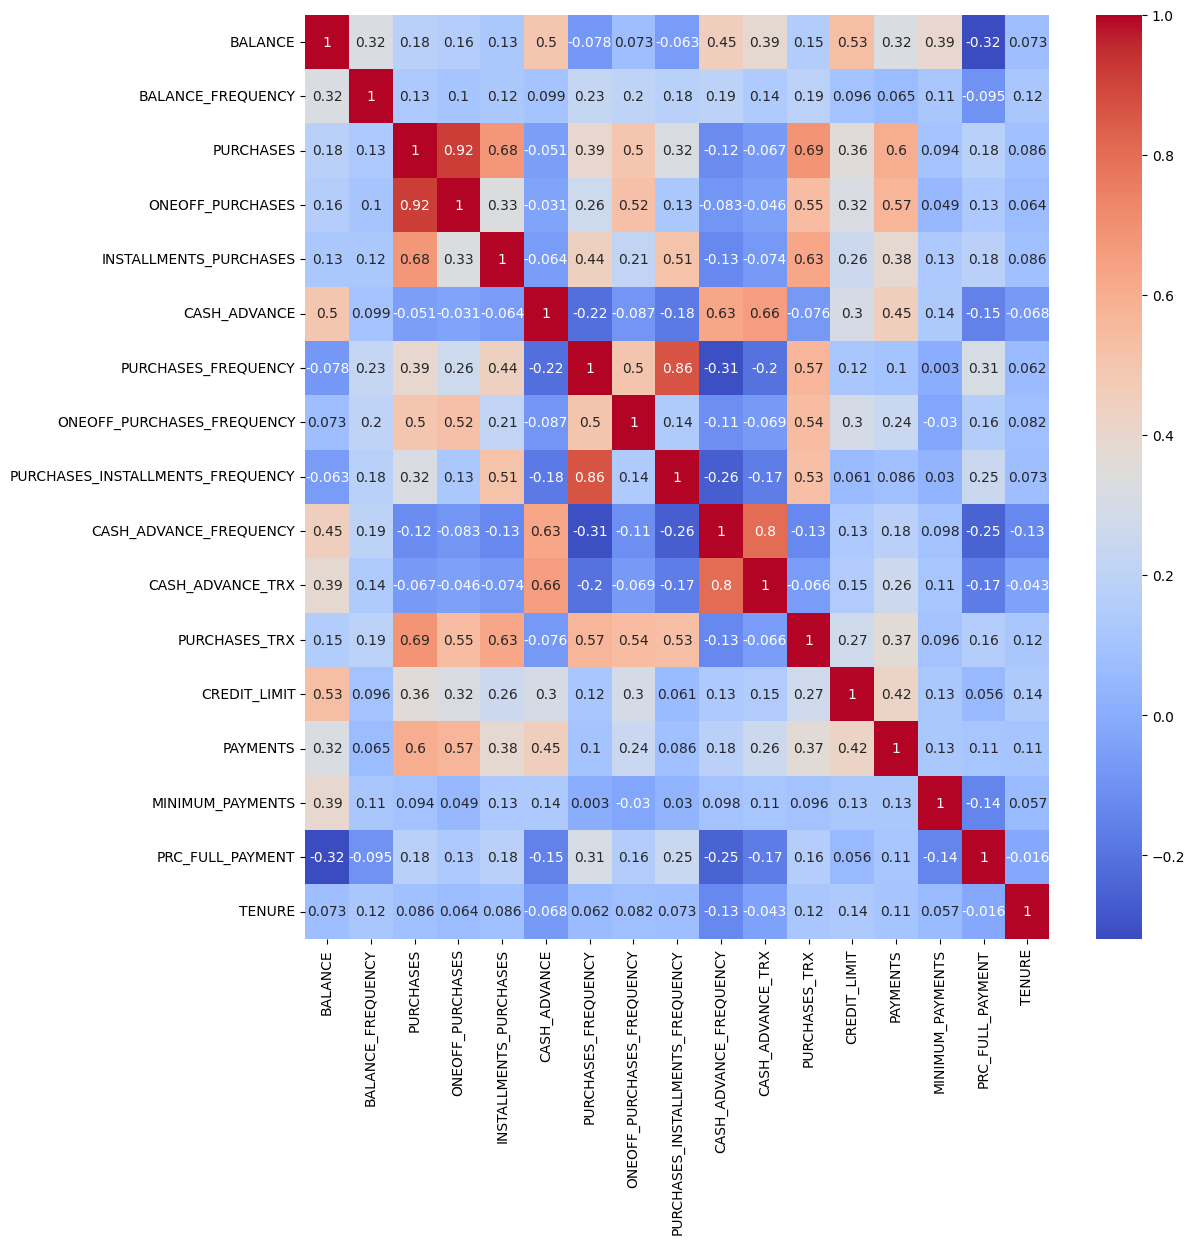

In [ ]:
plt.figure(figsize = (12, 12))
sns.heatmap(df.corr(), annot = True, cmap='coolwarm')
plt.show()

**outlier detection**

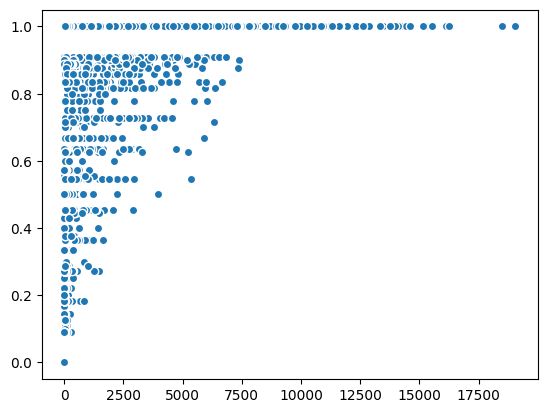

In [ ]:
plt.scatter(df["BALANCE"], df["BALANCE_FREQUENCY"], edgecolors="white");

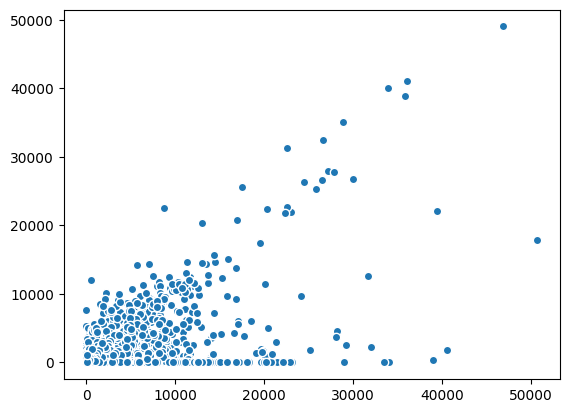

In [ ]:

plt.scatter(df["PAYMENTS"], df["PURCHASES"], edgecolors="white")

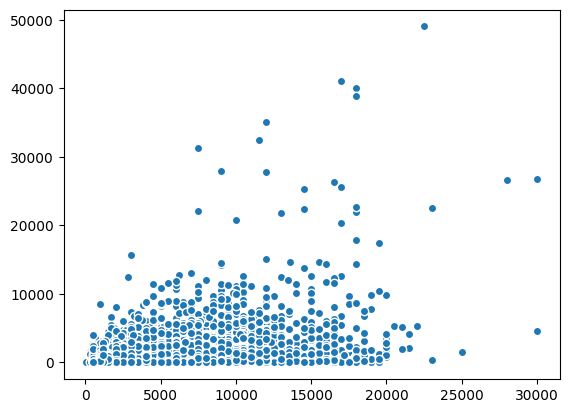

In [ ]:
plt.scatter(df["CREDIT_LIMIT"], df["PURCHASES"], edgecolors="white");


A continuación se preprocesan los datos

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

en este caso todas las columnas tienen variables númericas

In [ ]:
numeric = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE']

In [ ]:
tf = ColumnTransformer([('scaler', StandardScaler(), numeric)])


In [ ]:
X_preprocessed = tf.fit_transform(X_df)

print(f'El shape de X_titanic es: {X_df.shape}')
print(f'El shape de X_preprocessed es: {X_preprocessed.shape}')

El shape de X_titanic es: (8950, 17)
El shape de X_preprocessed es: (8950, 17)


In [ ]:
X_preprocessed[0]

array([-0.73198937, -0.24943448, -0.42489974, -0.35693402, -0.34907882,
       -0.46678555, -0.80649035, -0.67866081, -0.70731317, -0.67534886,
       -0.47606982, -0.51133325, -0.96043334, -0.52897879, -0.31096755,
       -0.52555097,  0.36067954])

In [ ]:
# inertia plotter function
def inertia_plot(clust, X, start = 2, stop = 20):
    inertia = []
    for x in range(start,stop):
        km = clust(n_clusters = x)
        labels = km.fit_predict(X)
        inertia.append(km.inertia_)
    plt.figure(figsize = (12,6))
    plt.plot(range(start,stop), inertia, marker = 'o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.title('Inertia plot with K')
    plt.xticks(list(range(start, stop)))
    plt.show()

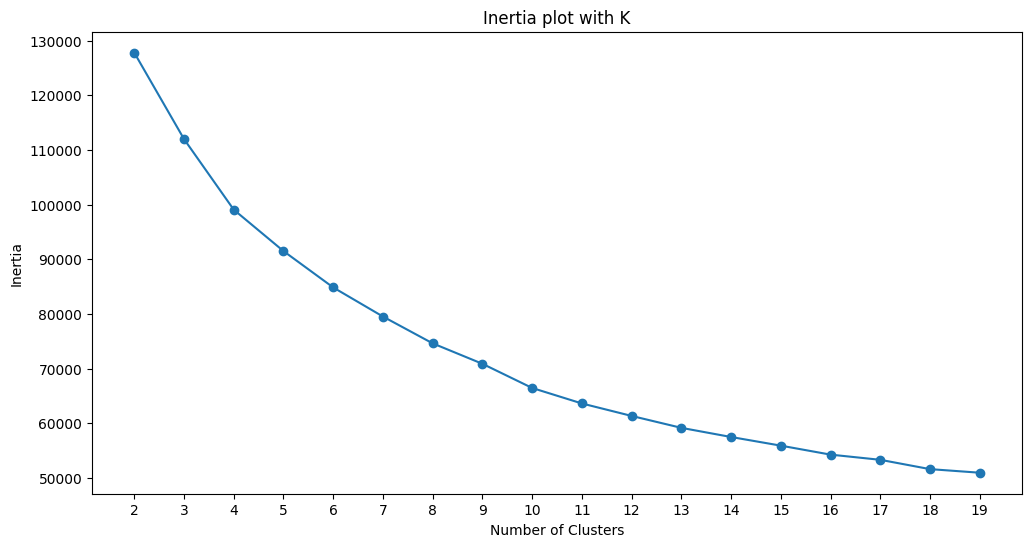

In [ ]:
inertia_plot(KMeans, X_preprocessed)

**Coeficiente de shiluetta función.**

In [ ]:
# Gráfica individual del resultado de un agrupamiento.
from sklearn.metrics import silhouette_score

def plot_cluster_predictions(clustering, X, n_clusters = None, cmap = 'tab10',
                             plot_data=True, plot_centers=True, show_metric=None,
                             title_str="", ax = None):

    assert not hasattr(clustering, "n_clusters") or \
           (hasattr(clustering, "n_clusters") and n_clusters is not None), "must specify `n_clusters` for "+str(clustering)

    if n_clusters is not None:
        clustering.n_clusters = n_clusters

    y = clustering.fit_predict(X)
    # remove elements tagged as noise (cluster nb<0)
    X = X[y>=0]
    y = y[y>=0]

    if n_clusters is None:
        n_clusters = len(np.unique(y))

    if ax is None:
        ax = plt.gca()

    if plot_data:
        sns.scatterplot(x=X[:,0], y=X[:,1], hue=y, palette=cmap,
                            legend=False, alpha=.5, ax=ax, s=40)

    if plot_centers and hasattr(clustering, "cluster_centers_"):
        sns.scatterplot(x=clustering.cluster_centers_[:,0],
                    y=clustering.cluster_centers_[:,1], hue = np.unique(y), s=180,  lw=3,
                    palette=cmap,
                    edgecolor="black", legend = False, ax = ax)

    if show_metric is not None:
        if show_metric == 'inercia' and hasattr(clustering, 'inertia_'):
          inertia = clustering.inertia_
          ax.set_title("Inercia = {:.0f}".format(inertia)+ title_str, fontdict=dict(family = 'serif', size = 20))
        elif show_metric == 'silueta':
          sc = silhouette_score(X, y) if len(np.unique(y)) > 1 else 0
          ax.set_title("Coeficiente de silueta = {:.3f}".format(sc)+ title_str, fontdict=dict(family = 'serif', size = 20))
    else:
        ax.set_title("k={}".format(n_clusters) +title_str, fontdict=dict(family = 'serif', size = 20))

    plt.axis("off")

    return

In [ ]:
# Gracicar la curva de aprendizaje de determinada métrica de agrupamiento.

def plot_metric(K, scores, metric_name):
  plt.figure(dpi=110, figsize=(9, 5))
  plt.plot(K, scores, 'bx-')
  plt.xticks(K); plt.xlabel('$k$', fontdict=dict(family = 'serif', size = 14));  plt.ylabel(metric_name, fontdict=dict(family = 'serif', size = 14));
  plt.title(f'K vs {metric_name}', fontdict=dict(family = 'serif', size = 18))
  plt.show()

In [ ]:
for x in range(2, 21):
    alg = KMeans(n_clusters = x, )
    label = alg.fit_predict(X_preprocessed)
    print('Silhouette-Score for', x,  'Clusters: ', silhouette_score(X_preprocessed, label))

Silhouette-Score for 2 Clusters:  0.2095040755841988
Silhouette-Score for 3 Clusters:  0.24992820493158993
Silhouette-Score for 4 Clusters:  0.19818094123202873
Silhouette-Score for 5 Clusters:  0.19331863471929533
Silhouette-Score for 6 Clusters:  0.20277605147557093
Silhouette-Score for 7 Clusters:  0.21442285324235338
Silhouette-Score for 8 Clusters:  0.221801200042358
Silhouette-Score for 9 Clusters:  0.22613521308598328
Silhouette-Score for 10 Clusters:  0.22080863236263526
Silhouette-Score for 11 Clusters:  0.2160747263960156
Silhouette-Score for 12 Clusters:  0.21721993036609433
Silhouette-Score for 13 Clusters:  0.21678604880394656
Silhouette-Score for 14 Clusters:  0.20010942802317833
Silhouette-Score for 15 Clusters:  0.2203436985436866
Silhouette-Score for 16 Clusters:  0.20709017182263337
Silhouette-Score for 17 Clusters:  0.1987108287762325
Silhouette-Score for 18 Clusters:  0.20917950994590168
Silhouette-Score for 19 Clusters:  0.2132873403683795
Silhouette-Score for 20 C

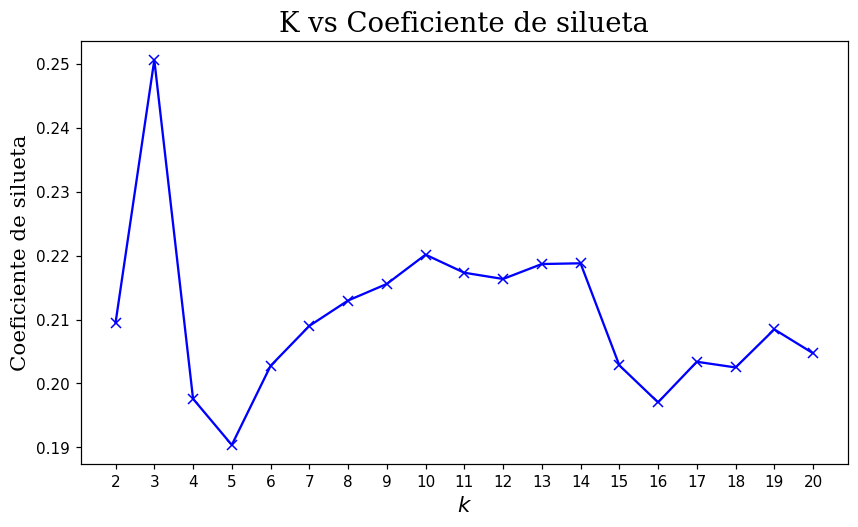

In [ ]:
silhouette = []
K = range(2, 21)
for i in K:
  # Declaramos y ejecutamos el algoritmo K-means.
  model = KMeans(n_clusters=i)
  model.fit(X_preprocessed)

  # Predecimos las etiquetas de X_preprocessed.
  y = model.predict(X_preprocessed)

  # Almacenamos la métrica de inercia y el coeficiente de silueta.
  silhouette.append(silhouette_score(X_preprocessed, y))

plot_metric(K, silhouette, 'Coeficiente de silueta')

**A partir de la evaluación del desempeño interno, podríamos concluir que un buen número para  𝑘  es 3, el valor que maximiza el coeficiente de silueta, sin embargo, el valor de inercia da alrededor de 9-10 clusters, esto no es bueno por esta razón, se utilizara la extracción de caracteristicas con PCA para mejorar la calidad del cluster.**

In [ ]:
from sklearn.decomposition import PCA

In [ ]:

for y in range(2, 5):
    print("PCA with # of components: ", y)
    pca = PCA(n_components=y)
    data_p = pca.fit_transform(X_preprocessed)
    for x in range(2, 7):
        alg = KMeans(n_clusters = x, )
        label = alg.fit_predict(data_p)
        print('Silhouette-Score for', x,  'Clusters: ', silhouette_score(data_p, label) , '       Inertia: ',alg.inertia_)
    print()


PCA with # of components:  2
Silhouette-Score for 2 Clusters:  0.46387174306908724        Inertia:  49657.962784583
Silhouette-Score for 3 Clusters:  0.4519609635835877        Inertia:  33017.03839043987
Silhouette-Score for 4 Clusters:  0.4076679110025568        Inertia:  24524.17387067222
Silhouette-Score for 5 Clusters:  0.40153084413892054        Inertia:  19457.14993952559
Silhouette-Score for 6 Clusters:  0.38355898591732657        Inertia:  16213.278995642595

PCA with # of components:  3
Silhouette-Score for 2 Clusters:  0.3423360352727771        Inertia:  61967.15887627695
Silhouette-Score for 3 Clusters:  0.380440319049412        Inertia:  46273.87034654863
Silhouette-Score for 4 Clusters:  0.37033469625822335        Inertia:  34574.37931461296
Silhouette-Score for 5 Clusters:  0.3693509096828184        Inertia:  28501.365532030337
Silhouette-Score for 6 Clusters:  0.33253209767817216        Inertia:  24769.859658655885

PCA with # of components:  4
Silhouette-Score for 2 Clu

 **2 PCA componentes con 5-6 clusters es la mejor opcion.**

Text(0, 0.5, 'PC2')

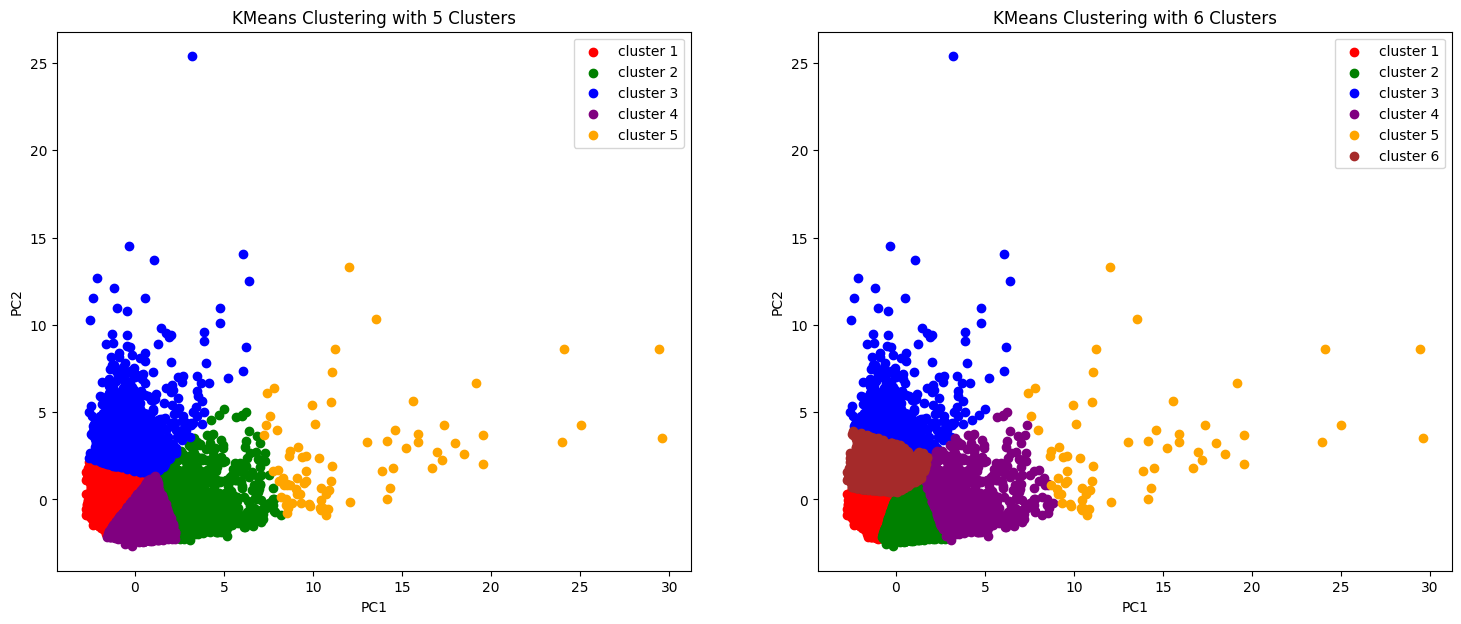

In [ ]:
data_p = pd.DataFrame(PCA(n_components = 2).fit_transform(X_preprocessed))
preds = pd.Series(KMeans(n_clusters = 5,).fit_predict(data_p))
data_p = pd.concat([data_p, preds], axis =1)
data_p.columns = [0,1,'target']

fig = plt.figure(figsize = (18, 7))
colors = ['red', 'green', 'blue', 'purple', 'orange', 'brown']
plt.subplot(121)
plt.scatter(data_p[data_p['target']==0].iloc[:,0], data_p[data_p.target==0].iloc[:,1], c = colors[0], label = 'cluster 1')
plt.scatter(data_p[data_p['target']==1].iloc[:,0], data_p[data_p.target==1].iloc[:,1], c = colors[1], label = 'cluster 2')
plt.scatter(data_p[data_p['target']==2].iloc[:,0], data_p[data_p.target==2].iloc[:,1], c = colors[2], label = 'cluster 3')
plt.scatter(data_p[data_p['target']==3].iloc[:,0], data_p[data_p.target==3].iloc[:,1], c = colors[3], label = 'cluster 4')
plt.scatter(data_p[data_p['target']==4].iloc[:,0], data_p[data_p.target==4].iloc[:,1], c = colors[4], label = 'cluster 5')
plt.legend()
plt.title('KMeans Clustering with 5 Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')


data_p = pd.DataFrame(PCA(n_components = 2).fit_transform(X_preprocessed))
preds = pd.Series(KMeans(n_clusters = 6,).fit_predict(data_p))
data_p = pd.concat([data_p, preds], axis =1)
data_p.columns = [0,1,'target']

plt.subplot(122)
plt.scatter(data_p[data_p['target']==0].iloc[:,0], data_p[data_p.target==0].iloc[:,1], c = colors[0], label = 'cluster 1')
plt.scatter(data_p[data_p['target']==1].iloc[:,0], data_p[data_p.target==1].iloc[:,1], c = colors[1], label = 'cluster 2')
plt.scatter(data_p[data_p['target']==2].iloc[:,0], data_p[data_p.target==2].iloc[:,1], c = colors[2], label = 'cluster 3')
plt.scatter(data_p[data_p['target']==3].iloc[:,0], data_p[data_p.target==3].iloc[:,1], c = colors[3], label = 'cluster 4')
plt.scatter(data_p[data_p['target']==4].iloc[:,0], data_p[data_p.target==4].iloc[:,1], c = colors[4], label = 'cluster 5')
plt.scatter(data_p[data_p['target']==5].iloc[:,0], data_p[data_p.target==5].iloc[:,1], c = colors[5], label = 'cluster 6')
plt.legend()
plt.title('KMeans Clustering with 6 Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')

Text(0, 0.5, 'PC2')

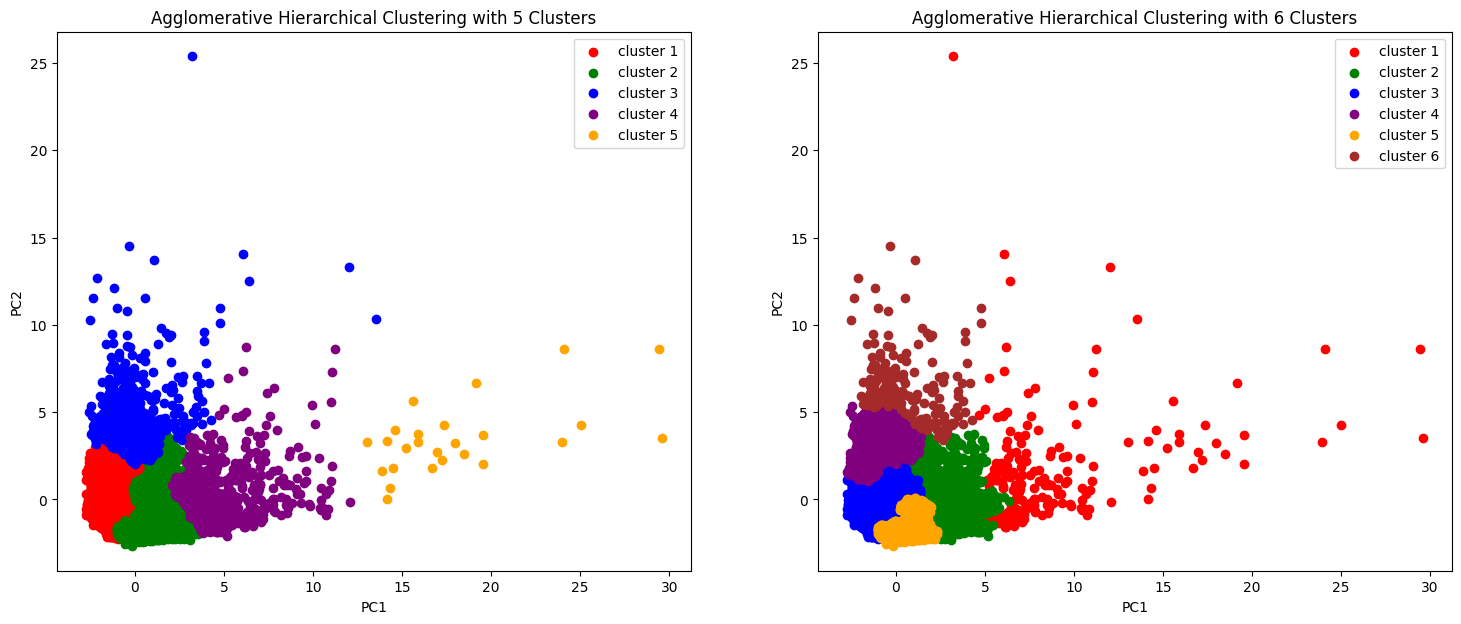

In [ ]:
data_p = pd.DataFrame(PCA(n_components = 2).fit_transform(X_preprocessed))
preds = pd.Series(AgglomerativeClustering(n_clusters = 5,).fit_predict(data_p))
data_p = pd.concat([data_p, preds], axis =1)
data_p.columns = [0,1,'target']

fig = plt.figure(figsize = (18, 7))
colors = ['red', 'green', 'blue', 'purple', 'orange', 'brown']
plt.subplot(121)
plt.scatter(data_p[data_p['target']==0].iloc[:,0], data_p[data_p.target==0].iloc[:,1], c = colors[0], label = 'cluster 1')
plt.scatter(data_p[data_p['target']==1].iloc[:,0], data_p[data_p.target==1].iloc[:,1], c = colors[1], label = 'cluster 2')
plt.scatter(data_p[data_p['target']==2].iloc[:,0], data_p[data_p.target==2].iloc[:,1], c = colors[2], label = 'cluster 3')
plt.scatter(data_p[data_p['target']==3].iloc[:,0], data_p[data_p.target==3].iloc[:,1], c = colors[3], label = 'cluster 4')
plt.scatter(data_p[data_p['target']==4].iloc[:,0], data_p[data_p.target==4].iloc[:,1], c = colors[4], label = 'cluster 5')
plt.legend()
plt.title('Agglomerative Hierarchical Clustering with 5 Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')


data_p = pd.DataFrame(PCA(n_components = 2).fit_transform(X_preprocessed))
preds = pd.Series(AgglomerativeClustering(n_clusters = 6,).fit_predict(data_p))
data_p = pd.concat([data_p, preds], axis =1)
data_p.columns = [0,1,'target']

plt.subplot(122)
plt.scatter(data_p[data_p['target']==0].iloc[:,0], data_p[data_p.target==0].iloc[:,1], c = colors[0], label = 'cluster 1')
plt.scatter(data_p[data_p['target']==1].iloc[:,0], data_p[data_p.target==1].iloc[:,1], c = colors[1], label = 'cluster 2')
plt.scatter(data_p[data_p['target']==2].iloc[:,0], data_p[data_p.target==2].iloc[:,1], c = colors[2], label = 'cluster 3')
plt.scatter(data_p[data_p['target']==3].iloc[:,0], data_p[data_p.target==3].iloc[:,1], c = colors[3], label = 'cluster 4')
plt.scatter(data_p[data_p['target']==4].iloc[:,0], data_p[data_p.target==4].iloc[:,1], c = colors[4], label = 'cluster 5')
plt.scatter(data_p[data_p['target']==5].iloc[:,0], data_p[data_p.target==5].iloc[:,1], c = colors[5], label = 'cluster 6')
plt.legend()
plt.title('Agglomerative Hierarchical Clustering with 6 Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')

**Exploratory Data Analysis**

In [ ]:
# select best columns
mejores_caracteristicas = ["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS"]

# dataframe with best columns
data_final = pd.DataFrame(X_df[mejores_caracteristicas])

print('New dataframe with best columns has just been created. Data shape: ' + str(data_final.shape))

New dataframe with best columns has just been created. Data shape: (8950, 6)


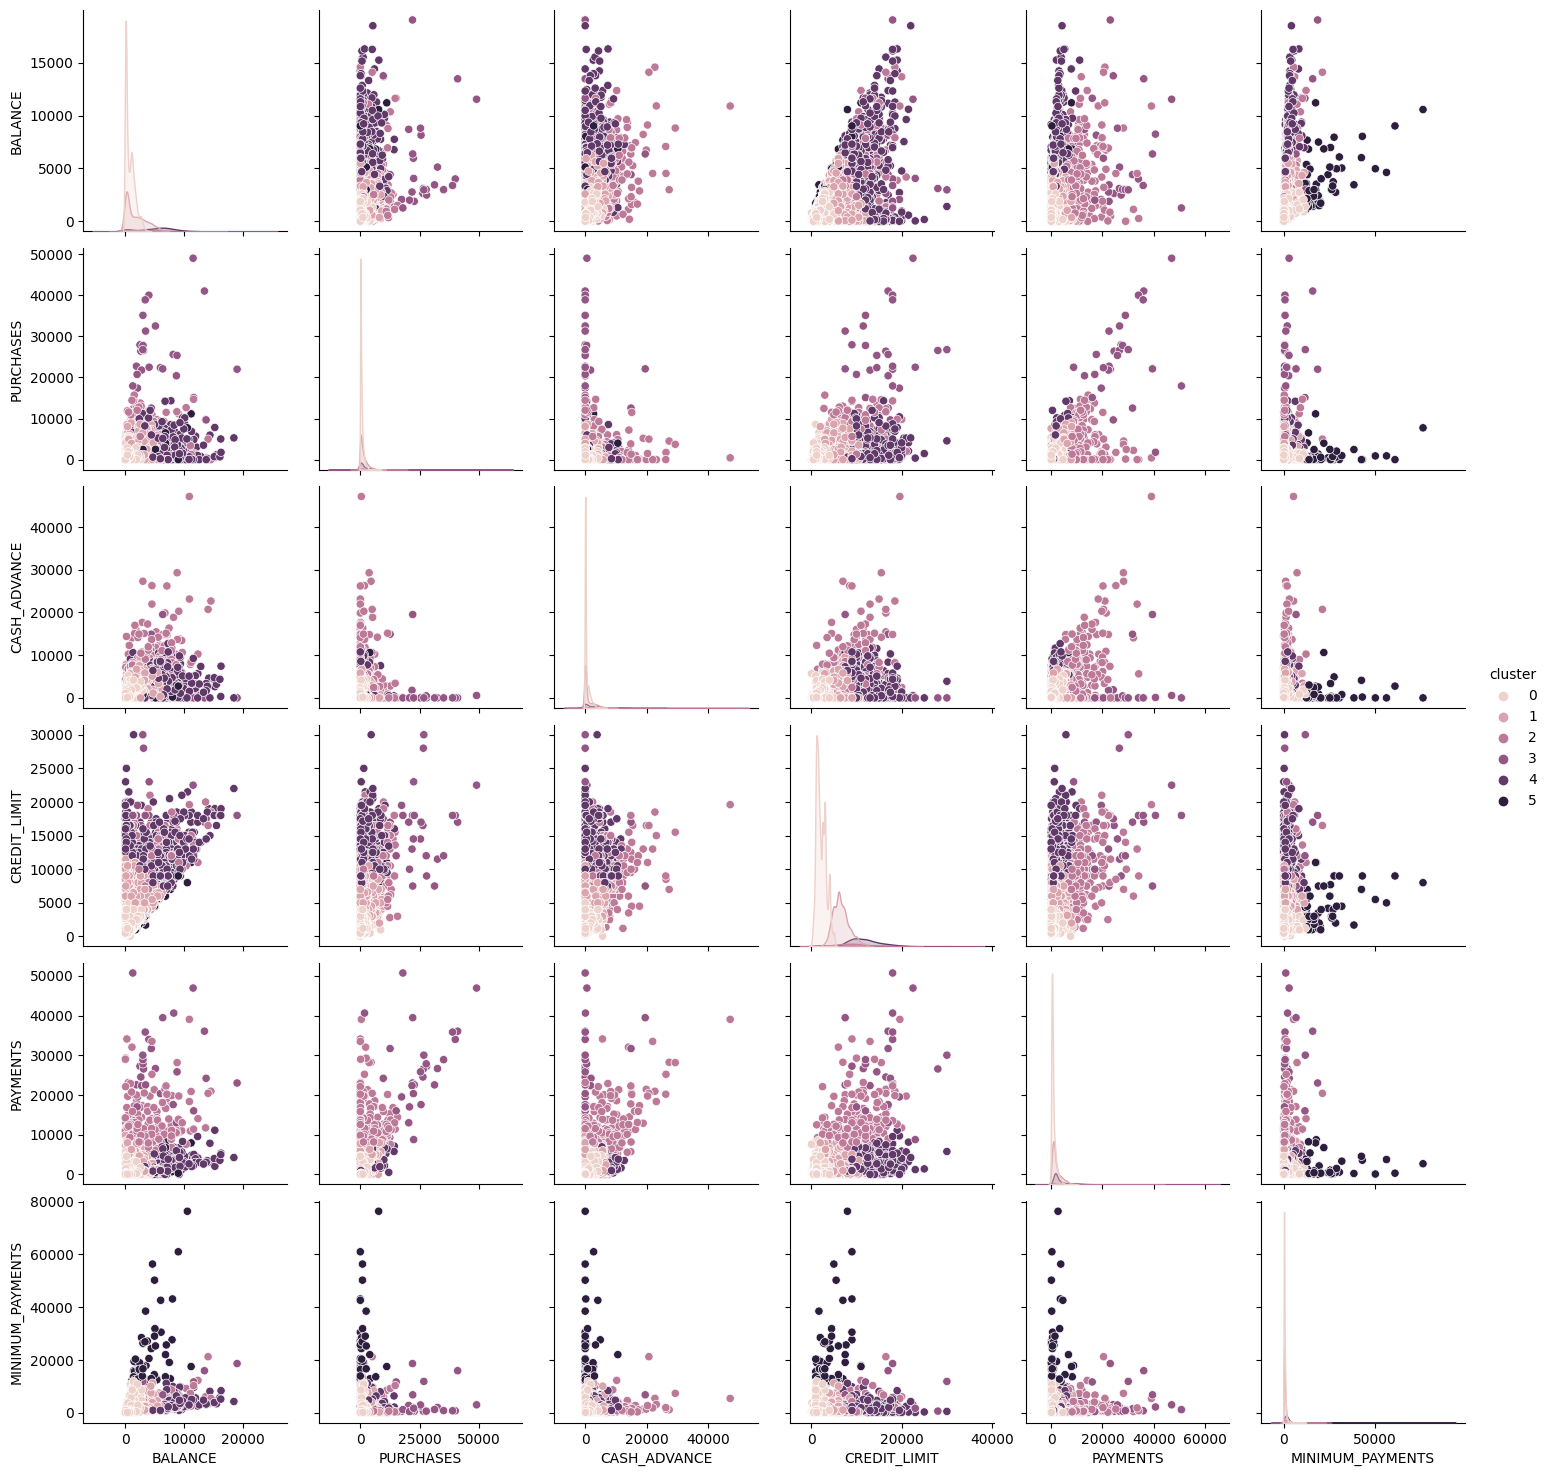

In [ ]:
# apply KMeans clustering
alg = KMeans(n_clusters = 6)
label = alg.fit_predict(data_final)

# create a 'cluster' column
data_final['cluster'] = label
mejores_caracteristicas.append('cluster')

# make a Seaborn pairplot
sns.pairplot(data_final[mejores_caracteristicas], hue='cluster')